# Working on ANN

In [3]:
import tensorflow

In [4]:
from tensorflow.keras.datasets import imdb


In [6]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [7]:
train_data[0]#e.g:1 kay liyay 10000 ka vector banay ga

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
train_labels[0]

1

In [29]:
train_data.shape

(25000,)

In [9]:
 max([max(sequence) for sequence in train_data])


9999

In [10]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [11]:
import numpy as np

In [13]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
         results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
y_train[0]

1.0

In [19]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [25]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [27]:
x_train.shape

(25000, 10000)

In [41]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [39]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

In [42]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 225us/sample - loss: 1.7399e-05 - acc: 1.0000 - val_loss: 1.3413 - val_acc: 0.8570
Epoch 2/20
15000/15000 [==============================] - 3s 218us/sample - loss: 1.4652e-05 - acc: 1.0000 - val_loss: 1.3713 - val_acc: 0.8563
Epoch 3/20
15000/15000 [==============================] - 3s 215us/sample - loss: 1.0928e-05 - acc: 1.0000 - val_loss: 1.4407 - val_acc: 0.8552
Epoch 4/20
15000/15000 [==============================] - 3s 221us/sample - loss: 0.0016 - acc: 0.9995 - val_loss: 1.4957 - val_acc: 0.8547
Epoch 5/20
15000/15000 [==============================] - 3s 220us/sample - loss: 8.8826e-06 - acc: 1.0000 - val_loss: 1.5004 - val_acc: 0.8551
Epoch 6/20
15000/15000 [==============================] - 3s 225us/sample - loss: 6.4095e-06 - acc: 1.0000 - val_loss: 1.5065 - val_acc: 0.8557
Epoch 7/20
15000/15000 [==============================] - 3s 228us/sample - loss: 5.2140e-

In [32]:
#check the highest  value of val_acccuracy

In [43]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

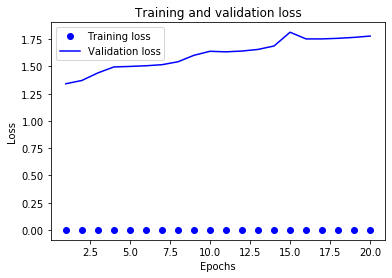

In [44]:
 import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

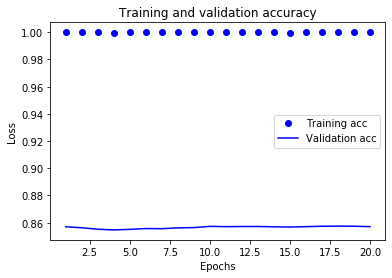

In [46]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [55]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=6, batch_size=512)


Epoch 1/6
25000/25000 [==============================] - 3s 130us/sample - loss: 0.4657 - acc: 0.8102
Epoch 2/6
25000/25000 [==============================] - 3s 115us/sample - loss: 0.2599 - acc: 0.9098
Epoch 3/6
25000/25000 [==============================] - 3s 108us/sample - loss: 0.2025 - acc: 0.9264
Epoch 4/6
25000/25000 [==============================] - 3s 108us/sample - loss: 0.1688 - acc: 0.9402
Epoch 5/6
25000/25000 [==============================] - 3s 108us/sample - loss: 0.1439 - acc: 0.9492
Epoch 6/6
25000/25000 [==============================] - 3s 116us/sample - loss: 0.1280 - acc: 0.9558


In [56]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 4s 151us/sample - loss: 0.3374 - acc: 0.8771


In [60]:
results = model.predict(x_test)

In [58]:
results

array([[0.14600211],
       [0.99997437],
       [0.9516498 ],
       ...,
       [0.14731541],
       [0.07311383],
       [0.6663553 ]], dtype=float32)

In [51]:
results[0]

array([0.19301113], dtype=float32)